In [45]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

In [16]:
import pandas as pd
data=pd.read_csv("electricity.csv")
data.head()

,date,0,1,2,3,4,5,6,7,8,...,311,312,313,314,315,316,317,318,319,OT
0,2016-07-01 02:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
1,2016-07-01 03:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2,2016-07-01 04:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
3,2016-07-01 05:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
4,2016-07-01 06:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0


In [14]:
cols = list(data.columns)
cols.remove('date')
data=data[['date'] + cols]
cols_data = data.columns[1:]
df = data[cols_data]

In [17]:
data[:96]

,date,0,1,2,3,4,5,6,7,8,...,311,312,313,314,315,316,317,318,319,OT
0,2016-07-01 02:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
1,2016-07-01 03:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2,2016-07-01 04:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
3,2016-07-01 05:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
4,2016-07-01 06:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2016-07-04 21:00:00,41.0,126.0,16.0,940.0,409.0,1547.0,28.0,1837.0,434.0,...,3663.0,1936.0,231500.0,15111.0,17025.0,515.0,157.0,1747.0,955.0,3612.0
92,2016-07-04 22:00:00,27.0,136.0,20.0,906.0,349.0,1614.0,32.0,1595.0,405.0,...,3629.0,1941.0,194100.0,14875.0,16683.0,513.0,134.0,1755.0,896.0,3332.0
93,2016-07-04 23:00:00,63.0,120.0,121.0,832.0,368.0,1351.0,23.0,1487.0,366.0,...,3702.0,1938.0,184500.0,14340.0,16184.0,512.0,86.0,2300.0,838.0,3436.0
94,2016-07-05 00:00:00,55.0,109.0,332.0,727.0,401.0,1339.0,21.0,1403.0,322.0,...,3245.0,1691.0,192000.0,11209.0,11138.0,504.0,148.0,2527.0,790.0,3417.0


In [4]:
device = "cuda:0"
torch.arange(100000).view(100,10,100).to(device)

tensor([[[    0,     1,     2,  ...,    97,    98,    99],
         [  100,   101,   102,  ...,   197,   198,   199],
         [  200,   201,   202,  ...,   297,   298,   299],
         ...,
         [  700,   701,   702,  ...,   797,   798,   799],
         [  800,   801,   802,  ...,   897,   898,   899],
         [  900,   901,   902,  ...,   997,   998,   999]],

        [[ 1000,  1001,  1002,  ...,  1097,  1098,  1099],
         [ 1100,  1101,  1102,  ...,  1197,  1198,  1199],
         [ 1200,  1201,  1202,  ...,  1297,  1298,  1299],
         ...,
         [ 1700,  1701,  1702,  ...,  1797,  1798,  1799],
         [ 1800,  1801,  1802,  ...,  1897,  1898,  1899],
         [ 1900,  1901,  1902,  ...,  1997,  1998,  1999]],

        [[ 2000,  2001,  2002,  ...,  2097,  2098,  2099],
         [ 2100,  2101,  2102,  ...,  2197,  2198,  2199],
         [ 2200,  2201,  2202,  ...,  2297,  2298,  2299],
         ...,
         [ 2700,  2701,  2702,  ...,  2797,  2798,  2799],
         [

In [20]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import os 
import pickle


전력 사용량: 고려사항 계절, 시간, 

In [11]:
from transformers import AutoTokenizer, AutoformerForPrediction, AutoformerConfig,AutoformerPreTrainedModel
import torch

config = AutoformerConfig.from_pretrained("elisim/autoformer-electricity-50-epochs_")
model = AutoformerForPrediction(config)


In [131]:
context_length = config.context_length
prediction_length = config.prediction_length
num_time_features = config.num_time_features
num_static_categorical_features = config.num_static_categorical_features
num_static_real_features = config.num_static_real_features
lag_seq = config.lags_sequence
seq_len=96

In [13]:
c=AutoformerPreTrainedModel(config)

In [15]:
c.

AutoformerPreTrainedModel()

In [1]:
import pandas as pd
df = pd.read_csv("electricity.csv",index_col=0)
df.index = pd.to_datetime(df.index)
target_col_idx = df.columns.get_loc('OT')

In [9]:
len(df.columns)

321

In [47]:
# elec.head()
input_len = 96
X_train=df.iloc[:96,:-1]
y_train=df.iloc[96:,-1]

In [95]:
import numpy as np

def create_time_features(df):
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['day_of_month'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

data = create_time_features(df)

In [49]:
target=data["OT"]
data=data.drop("OT",axis=1)

In [101]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoformerConfig, AutoformerForPrediction, Trainer, TrainingArguments

print(df.values)
class TimeSeriesDataset(Dataset):
    def __init__(self, data, input_length, prediction_length):
        self.data = data
        self.input_length = input_length
        self.prediction_length = prediction_length
        #  self.target_col_idx = target_col_idx
    
    def __len__(self):
        return len(self.data) - self.input_length - self.prediction_length 
    
    def __getitem__(self, idx):
        x = self.data[idx:idx + self.input_length]
        y = self.data[idx + self.input_length:idx + self.input_length + self.prediction_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
    
# Parameters
input_length = 96
prediction_lengths = [96, 192, 336, 720]

datasets = {pl: TimeSeriesDataset(data, input_length, pl) for pl in prediction_lengths}
dataloaders = {pl: DataLoader(datasets[pl], batch_size=32, shuffle=True) for pl in prediction_lengths}





[[1.400e+01 6.900e+01 2.340e+02 ... 1.000e+00 7.000e+00 2.016e+03]
 [1.800e+01 9.200e+01 3.120e+02 ... 1.000e+00 7.000e+00 2.016e+03]
 [2.100e+01 9.600e+01 3.120e+02 ... 1.000e+00 7.000e+00 2.016e+03]
 ...
 [1.200e+01 9.300e+01 8.000e+00 ... 1.000e+00 7.000e+00 2.019e+03]
 [1.000e+01 9.200e+01 8.000e+00 ... 2.000e+00 7.000e+00 2.019e+03]
 [1.100e+01 8.800e+01 8.000e+00 ... 2.000e+00 7.000e+00 2.019e+03]]


In [98]:
from transformers import AutoTokenizer, AutoformerForPrediction, AutoformerConfig,AutoformerPreTrainedModel
import torch

config = AutoformerConfig.from_pretrained("elisim/autoformer-electricity-50-epochs_")
model = AutoformerForPrediction(config)

In [42]:
for key, dataloader in dataloaders.items():
    print(f"DataLoader for key {key}:")
    # Iterate through the dataloader and print the first batch
    for x,y in dataloader:
        print(x.shape)
        print(y.shape)
        break 

DataLoader for key 96:


ValueError: too many values to unpack (expected 2)

In [44]:
for past_values, past_time_features, future_values,future_time_features in dataloader:
    print(past_values.shape)
    print(past_time_features.shape)
    print(future_values.shape)
    print(future_time_features.shape)
    break

torch.Size([32, 96, 320])
torch.Size([32, 96, 5])
torch.Size([32, 96, 320])
torch.Size([32, 96, 5])


In [102]:
import torch.optim as optim
import torch.nn.functional as F
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def train_model(model, dataloader, num_epochs=10):
    model.train()
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    
    for epoch in range(num_epochs):
        for x, past_time_features, y,future_time_features in dataloader:
            optimizer.zero_grad()
            outputs = model(
                past_values=x,
                past_time_features=past_time_features,
                past_observed_mask=None,
                future_values=y
            )
            loss = outputs.loss
            loss.backward()
            optimizer.step()
        
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Training with different prediction lengths
for pl, dataloader in dataloaders.items():
    print(f"Training for prediction length: {pl}")
    config.prediction_length = pl
    model = AutoformerForPrediction(config)
    train_model(model, dataloader)


Training for prediction length: 96


ValueError: could not determine the shape of object type 'DataFrame'

In [ ]:
from sympy.abc import y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01 02:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,265.0,...,199.0,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0
2016-07-01 03:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,340.0,...,265.0,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0
2016-07-01 04:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,300.0,...,278.0,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0
2016-07-01 05:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,211.0,...,271.0,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0
2016-07-01 06:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,179.0,...,267.0,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-04 21:00:00,41.0,126.0,16.0,940.0,409.0,1547.0,28.0,1837.0,434.0,336.0,...,1034.0,3663.0,1936.0,231500.0,15111.0,17025.0,515.0,157.0,1747.0,955.0
2016-07-04 22:00:00,27.0,136.0,20.0,906.0,349.0,1614.0,32.0,1595.0,405.0,338.0,...,648.0,3629.0,1941.0,194100.0,14875.0,16683.0,513.0,134.0,1755.0,896.0
2016-07-04 23:00:00,63.0,120.0,121.0,832.0,368.0,1351.0,23.0,1487.0,366.0,319.0,...,490.0,3702.0,1938.0,184500.0,14340.0,16184.0,512.0,86.0,2300.0,838.0


In [ ]:
config.feature_size

47

In [ ]:
config.context_length

48

In [ ]:
elec.shape

(26304, 327)

In [ ]:
elec.shape

(26304, 327)

In [69]:
elec = pd.read_csv("electricity.csv")


In [75]:
h = elec.head()
print(h.to_markdown())

|    | date                |   0 |   1 |   2 |   3 |   4 |    5 |   6 |    7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |   21 |   22 |   23 |   24 |   25 |   26 |   27 |   28 |   29 |   30 |   31 |   32 |   33 |   34 |   35 |   36 |   37 |   38 |   39 |   40 |   41 |   42 |   43 |   44 |   45 |   46 |   47 |   48 |   49 |   50 |   51 |   52 |   53 |   54 |   55 |   56 |   57 |   58 |   59 |   60 |   61 |   62 |   63 |   64 |   65 |   66 |   67 |   68 |   69 |   70 |   71 |   72 |   73 |   74 |   75 |   76 |   77 |   78 |   79 |   80 |   81 |   82 |   83 |   84 |   85 |   86 |   87 |   88 |   89 |   90 |   91 |   92 |   93 |   94 |   95 |   96 |   97 |   98 |   99 |   100 |   101 |   102 |   103 |   104 |   105 |   106 |   107 |   108 |   109 |   110 |   111 |   112 |   113 |   114 |   115 |   116 |   117 |   118 |   119 |   120 |   121 |   122 |   123 |   124 |   125 |   126 |   127 |   128 |   129 |   130 |   131 |   132 |   133 |   134 |

In [ ]:

past_time_features = np.zeros((context_length, num_time_features))
past_time_features[:, 0] = elec['date'].dt.month[:context_length]
past_time_features[:, 1] = elec['date'].dt.day[:context_length]
past_time_features[:, 2] = elec['date'].dt.weekday[:context_length]
past_time_features[:, 3] = elec['date'].dt.hour[:context_length]

last_date = elec['date'].iloc[context_length - 1]
future_dates = pd.date_range(start=last_date, periods=prediction_length + 1, freq='H')[1:]

future_time_features = np.zeros((prediction_length, num_time_features))
future_time_features[:, 0] = future_dates.month
future_time_features[:, 1] = future_dates.day
future_time_features[:, 2] = future_dates.weekday
future_time_features[:, 3] = future_dates.hour

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df_stamp = elec[['date']]
df_stamp['date'] = pd.to_datetime(df_stamp.date)
df_stamp['month'] = df_stamp.date.apply(lambda row: row.month, 1)
df_stamp['day'] = df_stamp.date.apply(lambda row: row.day, 1)
df_stamp['weekday'] = df_stamp.date.apply(lambda row: row.weekday(), 1)
df_stamp['hour'] = df_stamp.date.apply(lambda row: row.hour, 1)
data_stamp = df_stamp.drop(['date'], axis=1)

/tmp/ipykernel_49347/1587511085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stamp['date'] = pd.to_datetime(df_stamp.date)
/tmp/ipykernel_49347/1587511085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stamp['month'] = df_stamp.date.apply(lambda row: row.month, 1)
/tmp/ipykernel_49347/1587511085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
data_stamp.iloc[:context_length]

,month,day,weekday,hour
0,7,1,4,2
1,7,1,4,3
2,7,1,4,4
3,7,1,4,5
4,7,1,4,6
...,...,...,...,...
26299,7,1,0,21
26300,7,1,0,22
26301,7,1,0,23
26302,7,2,1,0


In [ ]:
elec["date"] = pd.to_datetime(elec["date"])
past_values = elec.iloc[:context_length, 1:].values.T  # Transpose to get shape (number of series, context_length)
past_time_features = np.random.rand(past_values.shape[0], context_length, num_time_features)  # Random time features
past_observed_mask = np.ones_like(past_values)
future_values = elec.iloc[context_length:-1, 1:].values.T
future_time_features = np.random.rand(future_values.shape[0], prediction_length, num_time_features)

In [ ]:
batch = {
    "past_values": torch.tensor(past_values, dtype=torch.float32),  # shape: (number of series, context_length)
    "past_time_features": torch.tensor(past_time_features, dtype=torch.float32),  # shape: (number of series, context_length, num_time_features)
    "past_observed_mask": torch.tensor(past_observed_mask, dtype=torch.float32),  # shape: (number of series, context_length)
    "future_time_features": torch.tensor(future_time_features, dtype=torch.float32)  # shape: (number of series, prediction_length, num_time_features)
}


In [ ]:
elec["date"] = pd.to_datetime(elec["date"])
elec["year"]=elec["date"].dt.year
elec["month"]=elec["date"].dt.month
elec["day"]=elec["date"].dt.day
elec["time"] = elec["date"].dt.time
elec["weekday"] = elec["date"].dt.weekday
elec["minut"] = elec["date"].dt.minute
elec = elec.set_index("date")

{0}

In [ ]:
outputs = model.generate(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    future_time_features=batch["future_time_features"],
    past_observed_mask=batch["past_observed_mask"]
)

ValueError: lags cannot go further than history length, found lag 721 while history length is only 48

In [ ]:
out_put = model.get_encoder()
out_put

AutoformerEncoder(
  (value_embedding): AutoformerValueEmbedding(
    (value_projection): Linear(in_features=47, out_features=16, bias=False)
  )
  (embed_positions): AutoformerSinusoidalPositionalEmbedding(72, 16)
  (layers): ModuleList(
    (0-1): 2 x AutoformerEncoderLayer(
      (self_attn): AutoformerAttention(
        (k_proj): Linear(in_features=16, out_features=16, bias=True)
        (v_proj): Linear(in_features=16, out_features=16, bias=True)
        (q_proj): Linear(in_features=16, out_features=16, bias=True)
        (out_proj): Linear(in_features=16, out_features=16, bias=True)
      )
      (self_attn_layer_norm): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      (activation_fn): GELUActivation()
      (fc1): Linear(in_features=16, out_features=32, bias=True)
      (fc2): Linear(in_features=32, out_features=16, bias=True)
      (final_layer_norm): AutoformerLayernorm(
        (layernorm): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      )
      (decomp1):

In [ ]:
elec = pd.read_csv("electricity.csv")
elec.head()

,date,0,1,2,3,4,5,6,7,8,...,311,312,313,314,315,316,317,318,319,OT
0,2016-07-01 02:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
1,2016-07-01 03:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2,2016-07-01 04:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
3,2016-07-01 05:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
4,2016-07-01 06:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0


In [ ]:
elec["date"] = pd.to_datetime(elec["date"])
# elec["year"]=elec["date"].dt.year
# elec["month"]=elec["date"].dt.month
# elec["day"]=elec["date"].dt.day
# elec["time"] = elec["date"].dt.time
elec = elec.set_index("date")

In [ ]:
target = elec["OT"]
feature = elec.drop("OT", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
predictions = model.

AttributeError: 'AutoformerForPrediction' object has no attribute 'predict'

In [ ]:
from huggingface_hub import hf_hub_download
import torch
from transformers import AutoformerForPrediction

file = hf_hub_download(
    repo_id="hf-internal-testing/tourism-monthly-batch", filename="train-batch.pt", repo_type="dataset"
)
batch = torch.load(file)
config = AutoformerConfig("huggingface/autoformer-tourism-monthly")
model = AutoformerForPrediction.from_pretrained("huggingface/autoformer-tourism-monthly")

# during training, one provides both past and future values
# as well as possible additional features
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
)

loss = outputs.loss
loss.backward()

# during inference, one only provides past values
# as well as possible additional features
# the model autoregressively generates future values
outputs = model.generate(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    future_time_features=batch["future_time_features"],
)

mean_prediction = outputs.sequences.mean(dim=1)

In [ ]:
batch["past_values"].shape

torch.Size([64, 61])

In [ ]:
batch["past_time_features"].shape

torch.Size([64, 61, 2])

In [ ]:
w.shape

torch.Size([64, 61, 1])

In [ ]:
batch["past_time_features"].shape

torch.Size([64, 61, 2])

In [ ]:
past_values.shape[0]

321

In [ ]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

In [ ]:
from gluonts.dataset.repository.datasets import get_dataset

dataset = get_dataset("electricity")
h = get_dataset("electricity_hourly")
freq = dataset.metadata.freq
prediction_length = dataset.metadata.prediction_length

In [ ]:
h.metadata

MetaData(freq='H', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat_0', cardinality='321')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=48)

In [ ]:
prediction_length



24

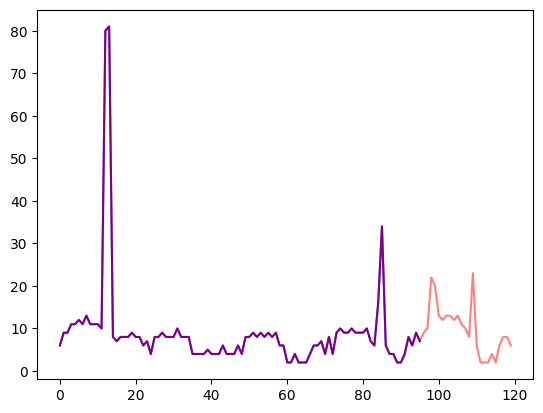

In [ ]:
import matplotlib.pyplot as plt

train_example = next(iter(dataset.train))
test_example = next(iter(dataset.test))

num_of_samples = 4*prediction_length

figure, axes = plt.subplots()
axes.plot(train_example["target"][-num_of_samples:], color="blue")
axes.plot(
    test_example["target"][-num_of_samples - prediction_length :],
    color="red",
    alpha=0.5,
)

plt.show()


In [ ]:
train_dataset = dataset.train
test_dataset = dataset.test

In [ ]:
import pandas as pd
pd.DataFrame(train_dataset)

,target,start,feat_static_cat,item_id
0,"[14.0, 18.0, 21.0, 20.0, 22.0, 20.0, 20.0, 20....",2012-01-01 00:00,[0],0
1,"[69.0, 92.0, 96.0, 92.0, 91.0, 92.0, 91.0, 92....",2012-01-01 00:00,[1],1
2,"[234.0, 312.0, 312.0, 312.0, 312.0, 187.0, 138...",2012-01-01 00:00,[2],2
3,"[415.0, 556.0, 560.0, 443.0, 346.0, 340.0, 376...",2012-01-01 00:00,[3],3
4,"[215.0, 292.0, 272.0, 213.0, 190.0, 178.0, 199...",2012-01-01 00:00,[4],4
...,...,...,...,...
316,"[48.0, 65.0, 64.0, 65.0, 75.0, 64.0, 65.0, 69....",2012-01-01 00:00,[316],316
317,"[38.0, 47.0, 43.0, 39.0, 40.0, 39.0, 49.0, 55....",2012-01-01 00:00,[317],317
318,"[1558.0, 2177.0, 2193.0, 1315.0, 1378.0, 1250....",2012-01-01 00:00,[318],318
319,"[182.0, 253.0, 218.0, 195.0, 191.0, 185.0, 191...",2012-01-01 00:00,[319],319


In [ ]:
from transformers import PretrainedConfig
from gluonts.time_feature import time_features_from_frequency_str

from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)

def create_transformation(freq: str, config: PretrainedConfig) -> Transformation:
    # create a list of fields to remove later
    remove_field_names = []
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    return Chain(
        # step 1: remove static/dynamic fields if not specified
        [RemoveFields(field_names=remove_field_names)]
        # step 2: convert the data to NumPy (potentially not needed)
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_CAT,
                    expected_ndim=1,
                    dtype=int,
                )
            ]
            if config.num_static_categorical_features > 0
            else []
        )
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_REAL,
                    expected_ndim=1,
                )
            ]
            if config.num_static_real_features > 0
            else []
        )
        + [
            AsNumpyArray(
                field=FieldName.TARGET,
                # we expect an extra dim for the multivariate case:
                expected_ndim=1 if config.input_size == 1 else 2,
            ),
            # step 3: handle the NaN's by filling in the target with zero
            # and return the mask (which is in the observed values)
            # true for observed values, false for nan's
            # the decoder uses this mask (no loss is incurred for unobserved values)
            # see loss_weights inside the xxxForPrediction model
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            # step 4: add temporal features based on freq of the dataset
            # these serve as positional encodings
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            # step 5: add another temporal feature (just a single number)
            # tells the model where in the life the value of the time series is
            # sort of running counter
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            # step 6: vertically stack all the temporal features into the key FEAT_TIME
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + (
                    [FieldName.FEAT_DYNAMIC_REAL]
                    if config.num_dynamic_real_features > 0
                    else []
                ),
            ),
            # step 7: rename to match HuggingFace names
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                }
            ),
        ]
    )


In [ ]:
from gluonts.transform import InstanceSplitter
from gluonts.transform.sampler import InstanceSampler
from typing import Optional


def create_instance_splitter(
    config: PretrainedConfig,
    mode: str,
    train_sampler: Optional[InstanceSampler] = None,
    validation_sampler: Optional[InstanceSampler] = None,
) -> Transformation:
    assert mode in ["train", "validation", "test"]

    instance_sampler = {
        "train": train_sampler
        or ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=config.prediction_length
        ),
        "validation": validation_sampler
        or ValidationSplitSampler(min_future=config.prediction_length),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field="values",
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=config.context_length + max(config.lags_sequence),
        future_length=config.prediction_length,
        time_series_fields=["time_features", "observed_mask"],
    )


In [ ]:
from typing import Iterable

import torch
from gluonts.itertools import Cyclic, Cached
from gluonts.dataset.loader import as_stacked_batches


def create_train_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    num_batches_per_epoch: int,
    shuffle_buffer_length: Optional[int] = None,
    cache_data: bool = True,
    **kwargs,
) -> Iterable:
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
        "future_values",
        "future_observed_mask",
    ]

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=True)
    if cache_data:
        transformed_data = Cached(transformed_data)

    # we initialize a Training instance
    instance_splitter = create_instance_splitter(config, "train")

    # the instance splitter will sample a window of
    # context length + lags + prediction length (from the 366 possible transformed time series)
    # randomly from within the target time series and return an iterator.
    stream = Cyclic(transformed_data).stream()
    training_instances = instance_splitter.apply(stream)

    return as_stacked_batches(
        training_instances,
        batch_size=batch_size,
        shuffle_buffer_length=shuffle_buffer_length,
        field_names=TRAINING_INPUT_NAMES,
        output_type=torch.tensor,
        num_batches_per_epoch=num_batches_per_epoch,
    )

def create_backtest_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data)

    # we create a Validation Instance splitter which will sample the very last
    # context window seen during training only for the encoder.
    instance_sampler = create_instance_splitter(config, "validation")

    # we apply the transformations in train mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=True)

    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )

def create_test_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)

    # We create a test Instance splitter to sample the very last
    # context window from the dataset provided.
    instance_sampler = create_instance_splitter(config, "test")

    # We apply the transformations in test mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=False)
    
    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )


In [ ]:
from transformers import AutoTokenizer, AutoformerForPrediction, AutoformerConfig,AutoformerPreTrainedModel
import torch

config = AutoformerConfig.from_pretrained("scirik/time-series-transformer-electricity-load-diagrams")
model = AutoformerForPrediction(config)
test_dataloader = create_backtest_dataloader(
    config=config,
    freq=freq,
    data=test_dataset,
    batch_size=64)


You are using a model of type time_series_transformer to instantiate a model of type autoformer. This is not supported for all configurations of models and can yield errors.


In [ ]:
from accelerate import Accelerator

# accelerator = Accelerator()
device='cuda:0'
model.to(device)
model.eval()

forecasts_ = []
for batch in test_dataloader:
    outputs = model.generate(
        static_categorical_features=batch["static_categorical_features"].to(device)
        if config.num_static_categorical_features > 0
        else None,
        static_real_features=batch["static_real_features"].to(device)
        if config.num_static_real_features > 0
        else None,
        past_time_features=batch["past_time_features"].to(device),
        past_values=batch["past_values"].to(device),
        future_time_features=batch["future_time_features"].to(device),
        past_observed_mask=batch["past_observed_mask"].to(device),
    )
    forecasts_.append(outputs.sequences.cpu().numpy())


/opt/conda/conda-bld/pytorch_1716905971873/work/aten/src/ATen/native/cuda/Indexing.cu:1289: indexSelectLargeIndex: block: [0,0,0], thread: [0,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1716905971873/work/aten/src/ATen/native/cuda/Indexing.cu:1289: indexSelectLargeIndex: block: [0,0,0], thread: [1,0,0] Assertion `srcIndex < srcSelectDimSize` failed.


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
batch.keys()

dict_keys(['past_time_features', 'past_values', 'past_observed_mask', 'future_time_features'])

In [ ]:
import numpy as np

forecasts = np.vstack(forecasts_)
print(forecasts.shape)

(2247, 100, 24)


In [ ]:
from tqdm.autonotebook import tqdm
from evaluate import load
from gluonts.time_feature import get_seasonality

mase_metric = load("evaluate-metric/mase")

forecast_median = np.median(forecasts, 1)

mase_metrics = []
for item_id, ts in enumerate(tqdm(test_dataset)):
    training_data = ts["target"][:-prediction_length]
    ground_truth = ts["target"][-prediction_length:]
    mase = mase_metric.compute(
        predictions=forecast_median[item_id], 
        references=np.array(ground_truth), 
        training=np.array(training_data), 
        periodicity=get_seasonality(freq))
    mase_metrics.append(mase["mase"])


100%|██████████| 2247/2247 [38:09<00:00,  1.02s/it]


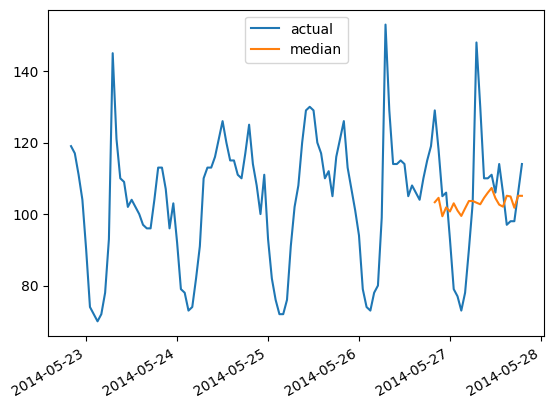

In [ ]:
import matplotlib.dates as mdates
import pandas as pd

test_ds = list(test_dataset)

def plot(ts_index):
    fig, ax = plt.subplots()

    index = pd.period_range(
        start=test_ds[ts_index][FieldName.START],
        periods=len(test_ds[ts_index][FieldName.TARGET]),
        freq=test_ds[ts_index][FieldName.START].freq,
    ).to_timestamp()

    ax.plot(
        index[-5*prediction_length:], 
        test_ds[ts_index]["target"][-5*prediction_length:],
        label="actual",
    )

    plt.plot(
        index[-prediction_length:], 
        np.median(forecasts[ts_index], axis=0),
        label="median",
    )
    
    plt.gcf().autofmt_xdate()
    plt.legend(loc="best")
    plt.show()

plot(1)


In [ ]:
len(test_ds)

2247